# Follow-Along Guides: Perform multiple linear regression

## Introduction

As you have learned, multiple linear regression helps you estimate the linear relationship between one continuous dependent variable and two or more independent variables. For data science professionals, this is a useful skill because it allows you to compare more than one variable to the variable you're measuring against. This provides the opportunity for much more thorough and flexible analysis. 

For this guide, you will be analyzing a small business' historical marketing promotion data. Each row corresponds to an independent marketing promotion where their business uses TV, social media, radio, and influencer promotions to increase sales. They previously had you work on finding a single variable that predicts sales, and now they are hoping to expand this analysis to include other variables that can help them target their marketing efforts.

To address the business' request, you will conduct a multiple linear regression analysis to estimate sales from a combination of independent variables. This will include:

* Exploring and cleaning data
* Using plots and descriptive statistics to select the independent variables
* Creating a fitting multiple linear regression model
* Checking model assumptions
* Interpreting model outputs and communicating the results to non-technical stakeholders

## Step 1: Imports

### Import packages

Import relevant Python libraries and modules.

In [2]:
# Import libraries and modules.

### YOUR CODE HERE ### 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

### Load dataset

`Pandas` was used to load the dataset `marketing_sales_data.csv` as `data`, now display the first five rows. The variables in the dataset have been adjusted to suit the objectives of this guide. As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this guide. Please continue with this guide by completing the following instructions.

In [3]:
# RUN THIS CELL TO IMPORT YOUR DATA.

### YOUR CODE HERE ### 
data = pd.read_csv('marketing_sales_data.csv')

# Display the first five rows.

### YOUR CODE HERE ### 

data.head()

,TV,Radio,Social Media,Influencer,Sales
0,Low,1.218354,1.270444,Micro,90.054222
1,Medium,14.949791,0.274451,Macro,222.741668
2,Low,10.377258,0.061984,Mega,102.774790
3,High,26.469274,7.070945,Micro,328.239378
4,High,36.876302,7.618605,Mega,351.807328


## Step 2: Data exploration

### Familiarize yourself with the data's features

Start with an exploratory data analysis to familiarize yourself with the data and prepare it for modeling.

The features in the data are:

* TV promotional budget (in "Low," "Medium," and "High" categories)
* Social media promotional budget (in millions of dollars)
* Radio promotional budget (in millions of dollars)
* Sales (in millions of dollars)
* Influencer size (in "Mega," "Macro," "Micro," and "Nano" categories)


**Question:** What are some purposes of EDA before constructing a multiple linear regression model?

The purpose of EDA before constructing a multiple linear regression model includes the following:
- The main purpose of EDA is to look at the data before making assumptions.
- Additionally, it can help identify error, and better understand pattern within the data, detect outliers or anormalies event and finding interesting relationship between the variables.

### Create a pairplot of the data

Create a pairplot to visualize the relationship between the continous variables in `data`.

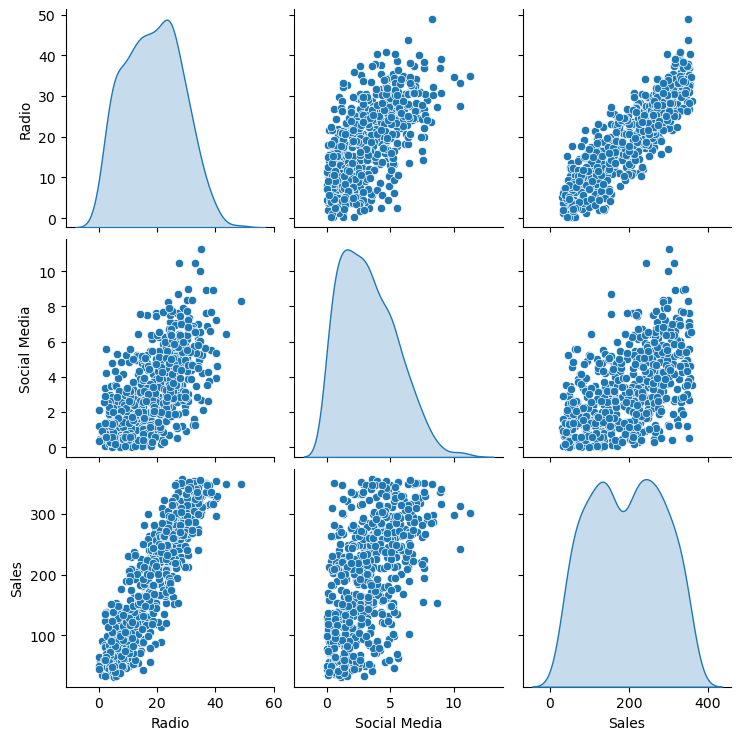

In [4]:
# Create a pairplot of the data.

### YOUR CODE HERE ### 

sns.pairplot(data, diag_kind="kde");

**Question:** Which variables have a linear relationship with `Sales`? Why are some variables in the data excluded from the preceding plot?



* The variable `Radio` have a strong linear relationship with `Sales`. There is a linear relationship between `Social Media` and `Sales` but it not as strong as the relationship observed with `Radio`

* The other variables such as `TV` and `Influencer` are excluded from the preceding plot because they are categorical variables.

### Calculate the mean sales for each categorical variable

There are two categorical variables: `TV` and `Influencer`. To characterize the relationship between the categorical variables and `Sales`, find the mean `Sales` for each category in `TV` and the mean `Sales` for each category in `Influencer`. 

In [5]:
# Calculate the mean sales for each TV category. 

### YOUR CODE HERE ### 

print(data.groupby(["TV"])["Sales"].mean())

# Calculate the mean sales for each Influencer category. 
print("")

### YOUR CODE HERE ### 
print(data.groupby(["Influencer"])["Sales"].mean())


TV
High      300.529591
Low        91.646843
Medium    199.023461
Name: Sales, dtype: float64

Influencer
Macro    205.660047
Mega     180.385096
Micro    198.655080
Nano     190.777766
Name: Sales, dtype: float64


**Question:** What do you notice about the categorical variables? Could they be useful predictors of `Sales`?



The average `Sales` for `High` `TV` promotions is considerably higher than for `Medium` and `Low` `TV` promotions. `TV` may be a strong predictor of `Sales`


The caterogiies for `Influencer` have different average `Sales`, but the variation is not substantial. `Influencer` amy be a weak predictor of `Sales`.



### Remove missing data

This dataset contains rows with missing values. To correct this, drop all rows that contain missing data.

In [6]:
# Drop rows that contain missing data and update the DataFrame.

### YOUR CODE HERE ### 
data = data.dropna(axis=0)

### Clean column names

The `ols()` function doesn't run when variable names contain a space. Check that the column names in `data` do not contain spaces and fix them, if needed.

In [7]:
# Rename all columns in data that contain a space. 

### YOUR CODE HERE ###
data = data.rename(columns = lambda col : col.replace(" ", "_"))


## Step 3: Model building

### Fit a multiple linear regression model that predicts sales

Using the independent variables of your choice, fit a multiple linear regression model that predicts `Sales` using two or more independent variables from `data`.

In [8]:
# Define the OLS formula.

### YOUR CODE HERE ### 
ols_formula = "Sales ~ C(TV) + Radio"


# Create an OLS model.

### YOUR CODE HERE ### 
OLS = ols(formula=ols_formula, data=data)


# Fit the model.

### YOUR CODE HERE ### 
model = OLS.fit()

# Save the results summary.

### YOUR CODE HERE ### 
model_results = model.summary()


# Display the model results.

### YOUR CODE HERE ### 
model_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     1782.
Date:                Tue, 11 Mar 2025   Prob (F-statistic):          1.61e-287
Time:                        14:11:56   Log-Likelihood:                -2701.4
No. Observations:                 569   AIC:                             5411.
Df Residuals:                     565   BIC:                             5428.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         217.6367      6.577     33.089      0.000     204.718     230.556
C(TV)[T.Low]     -152.0897      5.160    -29.474      0.000    -162.225    -141.954
C(TV)[T.Medium]   -73.4835      3.587    -20.484      0.000     -80.530     -66.437
Radio               2.8864      0.217     13.306      0.000       2.460       3.312
==============================================================================
Omnibus:                       35.219   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               13.863
Skew:                           0.087   Prob(JB):                     0.000976
Kurtosis:                       2.255   Cond. No.                         155.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Question:** Which independent variables did you choose for the model, and why?



* `TV` was selected, as the preceding analysis showed a strong relationship between `TV` promotional budget and average `Sales`.
* `Radio` was because the pairplot showed a strong linear relationship between `Radio` and `Sales`.
* `Influencer` was not selected because it did not show strong relationship to `Sales` in the preceding analysis.
* `Social_Media` was not selected because it doesn't improve the accuracy for the model. It is alway correlated with `Radio`. Also the p-value is high implying that it is not significant.

### Check model assumptions

For multiple linear regression, there is an additional assumption added to the four simple linear regression assumptions: **multicollinearity**. 

Check that all five multiple linear regression assumptions are upheld for your model.

### Model assumption: Linearity

Create scatterplots comparing the continuous independent variable(s) you selected previously with `Sales` to check the linearity assumption. Use the pairplot you created earlier to verify the linearity assumption or create new scatterplots comparing the variables of interest.

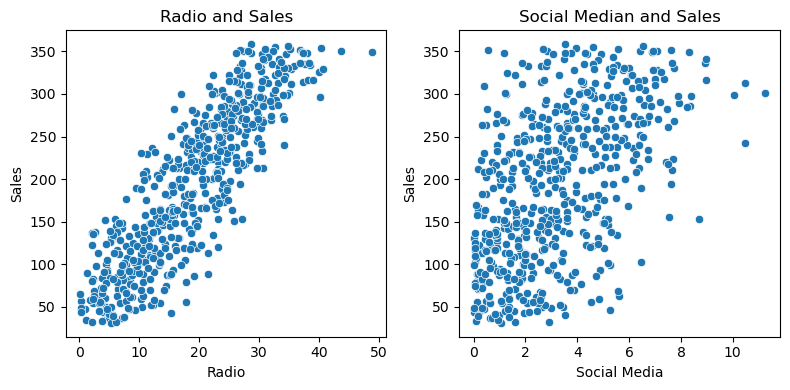

In [9]:
# Create a scatterplot for each independent variable and the dependent variable.

### YOUR CODE HERE ### 

fig, axes = plt.subplots(1, 2, figsize=(8,4))

#Create a scatterplot between radio and sales
sns.scatterplot(x=data["Radio"], y=data["Sales"], ax=axes[0])

#Set the title of the first plot
axes[0].set_title("Radio and Sales")

#Create a scatterplot between social media and sales
sns.scatterplot(x=data["Social_Media"], y=data["Sales"], ax=axes[1])

#Set the title of the first plot
axes[1].set_title("Social Median and Sales")

#Set xlabel of the second plot.
axes[1].set_xlabel("Social Media")

plt.tight_layout()

**Question:** Is the linearity assumption met?


* The linearity assumption holds for `Radio`, as there is a clear linear relationship in the scatterplot between `Radio` and `Sales`. `Social_Media` was not included in the preceeding multiple linear regression model, but it does appear to have a linear relationship with `Sales`.

### Model assumption: Independence

The **independent observation assumption** states that each observation in the dataset is independent. As each marketing promotion (i.e., row) is independent from one another, the independence assumption is not violated.

### Model assumption: Normality

Create the following plots to check the **normality assumption**:

* **Plot 1**: Histogram of the residuals
* **Plot 2**: Q-Q plot of the residuals

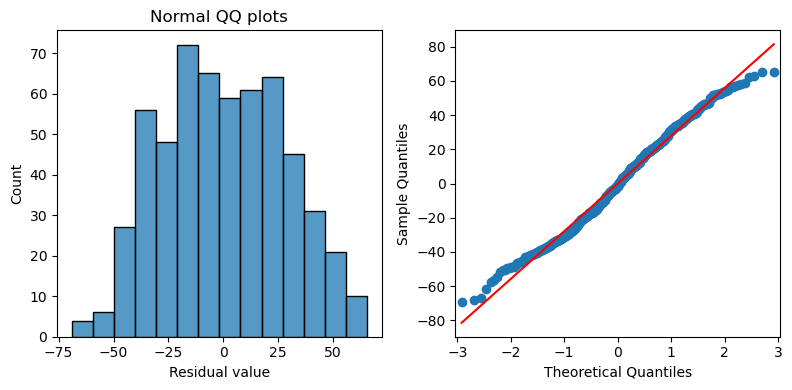

In [10]:
# Calculate the residuals.

### YOURz CODE HERE ### 
residuals = model.resid


# Create a histogram with the residuals. 

### YOUR CODE HERE ### 
fig, axes = plt.subplots(1, 2, figsize=(8,4))

sns.histplot(residuals, ax=axes[0] )

# Set the x label of the residuals
axes[0].set_xlabel("Residual value")

# Set the title of the residual plot.
axes[0].set_title("Histogram of Residuals")

# Create a Q-Q plot of the residuals.

### YOUR CODE HERE ### 
sm.qqplot(residuals, line='s', ax=axes[1])

# Set the title of the Q-Q plots
axes[0].set_title("Normal QQ plots")

plt.tight_layout()


**Question:** Is the normality assumption met?



* The histogram of the residuals are approximately normally distributed, which supports that the normality assumption if met for this mode. 

* The residuals in the Q-Q plot form a straight line, further supporting that this assumption is met.

### Model assumption: Constant variance

Check that the **constant variance assumption** is not violated by creating a scatterplot with the fitted values and residuals. Add a line at $y = 0$ to visualize the variance of residuals above and below $y = 0$.

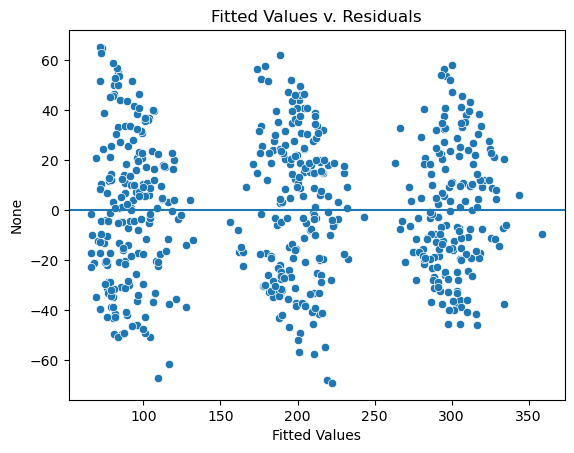

In [11]:
# Create a scatterplot with the fitted values from the model and the residuals.

### YOUR CODE HERE ### 
fig = sns.scatterplot(x=model.fittedvalues, y=model.resid)

# Set the x axis label.
fig.set_xlabel("Fitted Values")

# Set the title.
fig.set_title("Fitted Values v. Residuals")

# Add a line at y = 0 to visualize the variance of residuals above and below 0.

### YOUR CODE HERE ### 
fig.axhline(0)

plt.show()

**Question:** Is the constant variance assumption met?




The fitted values are in three groups because the categorical variable is dominating in this model, meaning that TV is the biggest factor that decides the sales.

However, the variance where there are fitted values is similarly distributed, validating that the assumption is met.

### Model assumption: No multicollinearity

The **no multicollinearity assumption** states that no two independent variables ($X_i$ and $X_j$) can be highly correlated with each other. 

Two common ways to check for multicollinearity are to:

* Create scatterplots to show the relationship between pairs of independent variables
* Use the variance inflation factor to detect multicollinearity

Use one of these two methods to check your model's no multicollinearity assumption.

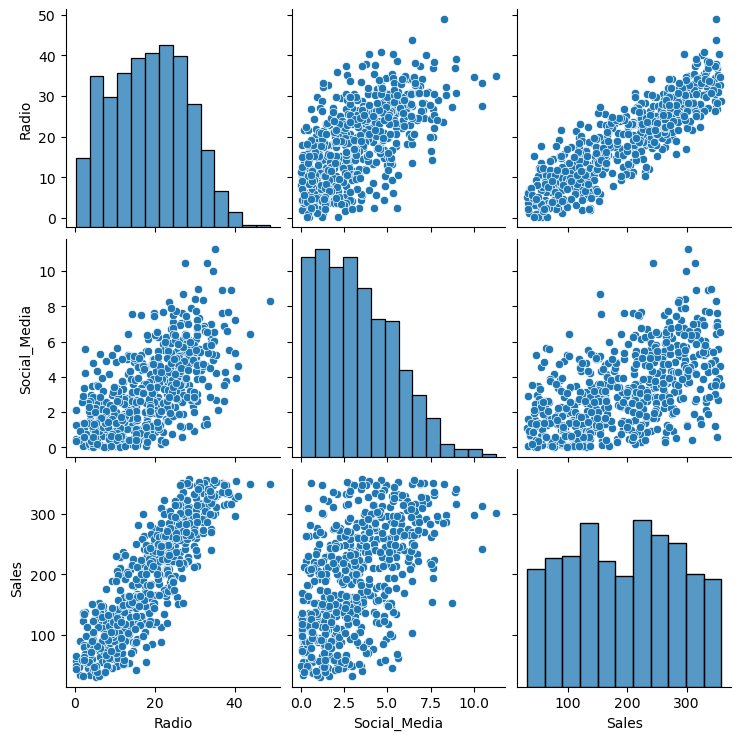

In [12]:
# Create a pairplot of the data.

### YOUR CODE HERE ### 

sns.pairplot(data);

In [13]:
# Calculate the variance inflation factor (optional).

### YOUR CODE HERE ### 

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create the subset of the data with the continue independent variables
X = data[["Radio", "Social_Media"]]

# Calculate the variance inflation factor for each variable
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Create a DataFrame with the VIF results for the columns names in X
df_vif = pd.DataFrame(vif, index=X.columns, columns=["VIF"])

# Display the VIF results
df_vif

,VIF
Radio,4.93238
Social_Media,4.93238


**Question 8:** Is the no multicollinearity assumption met?



The preceding model only has one continous independent variable, meaning there are no multicollinearity issues.

If a model used both `Radio` and `Social_Media` as predictors, there would be moderate linear relationship `Radio` and `Social_Media` that violates the multicollinearity assumption. Furthermore, the variance inflation factor when both `Radio` and `Social_Media` are inclused in the model is 5.17 for each variable, indicating high multicollinearity.

## Step 4: Results and evaluation

### Display the OLS regression results

If the model assumptions are met, you can interpret the model results accurately.

First, display the OLS regression results.

In [14]:
# Display the model results summary.

### YOUR CODE HERE ### 
model_results


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     1782.
Date:                Tue, 11 Mar 2025   Prob (F-statistic):          1.61e-287
Time:                        14:11:56   Log-Likelihood:                -2701.4
No. Observations:                 569   AIC:                             5411.
Df Residuals:                     565   BIC:                             5428.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         217.6367      6.577     33.089      0.000     204.718     230.556
C(TV)[T.Low]     -152.0897      5.160    -29.474      0.000    -162.225    -141.954
C(TV)[T.Medium]   -73.4835      3.587    -20.484      0.000     -80.530     -66.437
Radio               2.8864      0.217     13.306      0.000       2.460       3.312
==============================================================================
Omnibus:                       35.219   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               13.863
Skew:                           0.087   Prob(JB):                     0.000976
Kurtosis:                       2.255   Cond. No.                         155.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Question:** What is your interpretation of the model's R-squared?


* Using `TV` and `Radio` as the independent variables results in a multiple linear regression model with R^2=0.904. In other words, the model explains 90.4% of the variation in `Sales`. This makes the model an excellent predictor of `Sales`

### Interpret model coefficients

With the model fit evaluated, you can look at the coefficient estimates and the uncertainty of these estimates.

Again, display the OLS regression results.

In [15]:
# Display the model results summary.

### YOUR CODE HERE ### 
model_results


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     1782.
Date:                Tue, 11 Mar 2025   Prob (F-statistic):          1.61e-287
Time:                        14:11:56   Log-Likelihood:                -2701.4
No. Observations:                 569   AIC:                             5411.
Df Residuals:                     565   BIC:                             5428.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         217.6367      6.577     33.089      0.000     204.718     230.556
C(TV)[T.Low]     -152.0897      5.160    -29.474      0.000    -162.225    -141.954
C(TV)[T.Medium]   -73.4835      3.587    -20.484      0.000     -80.530     -66.437
Radio               2.8864      0.217     13.306      0.000       2.460       3.312
==============================================================================
Omnibus:                       35.219   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               13.863
Skew:                           0.087   Prob(JB):                     0.000976
Kurtosis:                       2.255   Cond. No.                         155.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Question:** What are the model coefficients?



When `TV` and `Radio` are used to predict `Sales`, the model coefficients are:

* $\beta_{0} =  218.5261$
* $\beta_{TVLow}= -154.2971$
* $\beta_{TVMedium} = -75.3120$
* $\beta_{Radio} =  2.9669$

**Question:** How would you write the relationship between `Sales` and the independent variables as a linear equation?



$\text{Sales} = \beta_{0} + \beta_{1}*X_{1}+ \beta_{2}*X_{2}+ \beta_{3}*X_{3}$

$\text{Sales} = \beta_{0} + \beta_{TVLow}*X_{TVLow}+ \beta_{TVMedium}*X_{TVMedium}+ \beta_{Radio}*X_{Radio}$

$\text{Sales} = 218.5261 - 154.2971*X_{TVLow} - 75.3120*X_{TVMedium}+ 2.9669 *X_{Radio}$

**Question:** What is your intepretation of the coefficient estimates? Are the coefficients statistically significant?



The default `TV` category for the model is `High` since there are coefficients for the other two `TV` categories, `Medium` and `Low`. Because the coefficients for the `Medium` and `Low` `TV` categories are negative, that means the average of sales is lower for `Medium` and `Low` `TV` categories compared to the `High` category when `Radio` is at the same level.

For example, the model predicts that a `Low` `TV` promotion is 154.2971 lower on avarage compared to a `High` `TV` promotion given the same `Radio` promotion.

The coefficient for `Radio` is positive, confirming the positive linear relationship shown earlier during the exploratory data analysis.

The p-value for all coeffiencet is $0.000$, meaning all coefficients are statistically significant at $p=0.05$. The 95% confidence intervals for each coefficient shold be reported when presenting the result to stakeholders.

For example, there is a $95\%$ chance that the interval $[-163.979,-144.616]$ contains the true parameter of the slope of $\beta_{TVLow}$, which is the estimated difference in promotion sales when a `Low` `TV` promotion is chosen instead of a `High` `TV` promotion.

**Question:** Why is it important to interpret the beta coefficients?




Beta coefficients allow you to estimate the magnitude and direction (positive or negative) of the effect of each independent variable on the dependent variable. The coefficient estimates can be converted to explainable insights, such as the connection between an increase in TV promotional budgets and sales mentioned previously.

**Question:** What are you interested in exploring based on your model?




* Providing the business with the estimated sales given different TV promotions and radio budgets
* Additional plots to help convey the results, such as using the `seaborn` `regplot()` to plot the data with a best fit regression line

**Question:** Do you think your model could be improved? Why or why not? How?

Given how accurate the `TV` was a predictor, the model could be improved by getting a more granular view of the `TV` promotions, such as by considering more categories or the actual `TV` promotional budget.

Furthermore, additional variables, suchas the location of the marking campaign or the time of year could increase the model accuracy.

## Conclusion

**What are the key takeaways from this guide?**

* Multiple linear regression is a powerful tool to estimate a dependent continous variable from several independent variables.
* Exploratory data analysis is useful for selecting both numeric and categorical features for multiple linear regression.
* Fitting multiple linear regression models may require trial and error to select variables that fit an accurate model while maintaining model assumptions.

**What results can be presented from this guide?**

According to the model, high TV promotional budgets result in significantly more sales than medium and low TV promotional budgets. For example, the model predicts that a `Low` `TV` promotion is 154.2971 lower on average than a `high` `TV` promotion given the same `Radio` promotion.

The coefficient for radio is positive, confirming the positive linear relationship shown earlier during the exploratory data analysis.

The p-value for all coefficients is $0.000$, meaning all coefficients are statistically significant at $p=0.05$. The 95% confidence intervals for each coefficient should be reported when presenting results to stakeholders. 

For example, there is a $95\%$ chance the interval $[-163.979,-144.616]$ contains the true parameter of the slope of $\beta_{TVLow}$, which is the estimated difference in promotion sales when a low TV promotional budget is chosen instead of a high TV promotion budget.

**How would you frame your findings to external stakeholders?**

High TV promotional budgets have a substantial positive influence on sales. The model estimates that switching from a high to medium TV promotional budget reduces sales by $\$75.3120$ million (95% CI $[-82.431,-68.193])$, and switching from a high to low TV promotional budget reduces sales by $\$154.297$ million (95% CI $[-163.979,-144.616])$. The model also estimates that an increase of $\$1$ million in the radio promotional budget will yield a $\$2.9669$ million increase in sales (95% CI $[2.551,3.383]$).

Thus, it is recommended that the business allot a high promotional budget to TV when possible and invest in radio promotions to increase sales. 


#### **References**

Saragih, H.S. (2020). [*Dummy Marketing and Sales Data*](https://www.kaggle.com/datasets/harrimansaragih/dummy-advertising-and-sales-data).